In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from module.data_prep import prep_recipe_data
from pathlib import Path

In [ ]:
save_things = False

cwd = Path.cwd()

fig_dir = cwd.parent / 'figures' / 'visualisations'
fig_dir.mkdir(parents=True, exist_ok=True)


In [11]:
rn_df, meta_df = prep_recipe_data()

cuisine_list = meta_df.cuisine.dropna().unique()

recipe_list = rn_df.r_id.dropna().unique()

ingredient_list = list(set(rn_df.ingredient.dropna().unique()) - {''})
# rn_df = rn_df[rn_df['ingredient'].isin(ingredient_list)].reset_index(drop=True)
rn_df = rn_df[rn_df['ingredient'].isin(ingredient_list)].reset_index(drop=True)

In [12]:
recipes_by_cuisine = meta_df.groupby('cuisine').r_id.apply(list)
topn = None # get topn recipes per cuisine
sample_recipe_ids = [i[:topn] for i in recipes_by_cuisine.values]
sample_recipe_ids_arr =  np.hstack(sample_recipe_ids)
sample_recipe_ingredients = rn_df.query('r_id.isin(@sample_recipe_ids_arr)')
sample_recipe_ingredients_arr = sample_recipe_ingredients.ingredient.unique()

In [13]:
rc_edges = []

for ind, c in enumerate(cuisine_list): 
    for recipe in sample_recipe_ids[ind]:
        edge = [c, recipe]
        rc_edges.append(edge)

ri_edges = sample_recipe_ingredients[['r_id', 'ingredient']].to_numpy()

all_edges = np.concatenate([rc_edges, ri_edges])

In [14]:
layout ={}
node_color = {}

for ind, c in enumerate(cuisine_list): 
    layout[c] = [0, -ind*(50/len(cuisine_list))]
    node_color[c] = '#144484'

for ind, r in enumerate(sample_recipe_ids_arr):
    layout[r] = [5, -ind*(50/len(sample_recipe_ids_arr))]
    node_color[r] = 'black'#'#8FCE00'

for ind, i in enumerate(sample_recipe_ingredients_arr):
    layout[i] = [10, -ind*(50/len(sample_recipe_ingredients_arr))]
    node_color[i] = '#F44336'

In [15]:
ri_graph = nx.Graph()
ri_graph.add_edges_from(ri_edges)
rc_graph = nx.Graph()
rc_graph.add_edges_from(rc_edges)


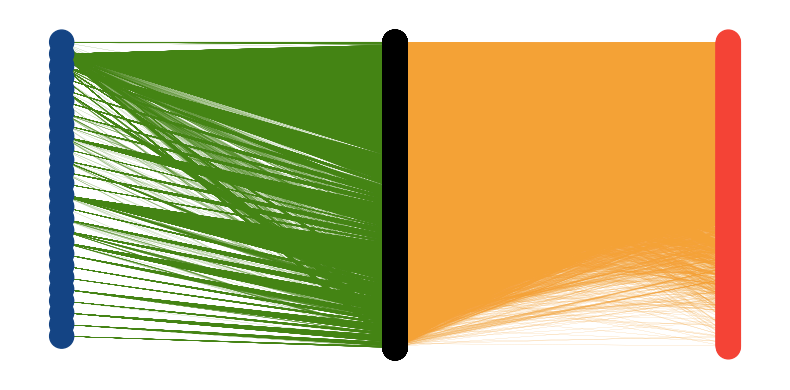

In [16]:
g = nx.Graph()
g.add_edges_from(all_edges)


plt.figure(figsize=(8,4))
nx.draw_networkx_edges(rc_graph, pos=layout, alpha=1, width=0.1, edge_color='#448414')
nx.draw_networkx_edges(ri_graph, pos=layout, alpha=1, width=0.1, edge_color='#F4A236')

nx.draw_networkx_nodes(g, pos=layout, node_color=[node_color.get(i) for i in g.nodes()])
plt.box(False)

plt.tight_layout()
if save_things:
    plt.savefig(fig_dir / 'rn_vis.png', dpi=300)
    plt.savefig(fig_dir / 'rn_vis.pdf', dpi=300)

plt.show()